In [138]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import IPython.display

In [139]:
# has to be set in order to show the image in notebook
%matplotlib inline 

In [140]:
y, sr = librosa.load("/Users/muddCS15/Documents/RealDrums/and-kick-snare.wav", duration=2.00, offset=13.00)
# returns a numpy array series => assigned to y
#   and the sampling rate of y => assigned to sr (signal rate)

In [141]:
IPython.display.Audio(data=y, rate=sr) # Preview Audio in notebook

In [142]:
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)

In [143]:
print('Estimated tempo: {:.2f} beats per minute'.format(tempo))

Estimated tempo: 112.35 beats per minute


In [144]:
# Save the frames to CSV
beat_times = librosa.frames_to_time(beat_frames, sr=sr)
librosa.output.times_csv('beat_times.csv', beat_times)
print('Saving output to beat_times.csv')

Saving output to beat_times.csv


<matplotlib.colorbar.Colorbar instance at 0x113fc3ab8>

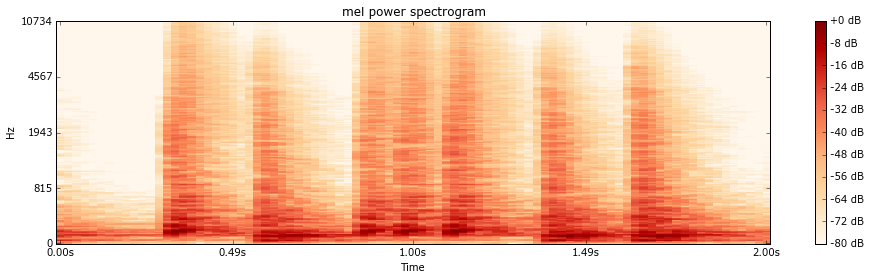

In [145]:
# Extract Mel Spectrogram
S = librosa.feature.melspectrogram(y, sr=sr, n_mels=256) 

# Convert to log scale (dB). We'll use the peak power as reference.
log_S = librosa.logamplitude(S, ref_power=np.max)

plt.figure(figsize=(16,4))

# Display the spectrogram on a mel scale
# sample rate and hop length parameters are used to render the time axis
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')
plt.title('mel power spectrogram')
plt.colorbar(format='%+02.0f dB')

In [146]:
onset_frames = librosa.onset.onset_detect(y=y, sr=sr)

In [147]:
onset_times  = librosa.frames_to_time(onset_frames, sr=sr)
print  "There are %d onsets" % len(onset_times) 
print onset_times
o_env = librosa.onset.onset_strength(y, sr=sr)

There are 7 onsets
[ 0.32507937  0.60371882  0.88235828  1.021678    1.13777778  1.39319728
  1.64861678]


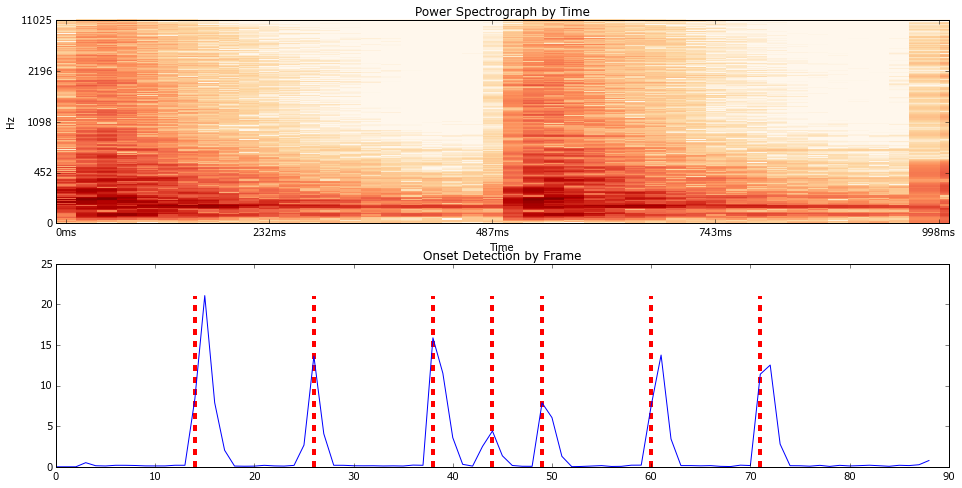

In [148]:
D = np.abs(librosa.stft(y2))**2
plt.figure(figsize=(16,8)) 

plt.subplot(2, 1, 1)
plt.title('Power Spectrograph by Time')
librosa.display.specshow(librosa.logamplitude(D, ref_power=np.max), x_axis='time', y_axis='log')

plt.subplot(2, 1, 2)
plt.title('Onset Detection by Frame')
plt.plot(o_env, label="Onset strength")
plt.vlines(onset_frames, 0, o_env.max(), color='r', linewidth=4.00, linestyles="--")

In [149]:
y2, sr2 = librosa.load("/Users/muddCS15/Documents/RealDrums/and-kick-snare.wav", duration=1.00, offset=7.65)

In [150]:
IPython.display.Audio(data=y2, rate=sr2) # Preview Audio in notebook

<matplotlib.colorbar.Colorbar instance at 0x1159d5170>

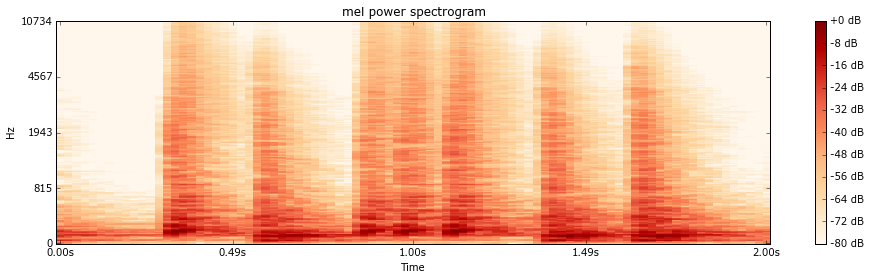

In [151]:
S2 = librosa.feature.melspectrogram(y=y2, sr=sr2, n_mels=256) 
log_S2 = librosa.logamplitude(S2, ref_power=np.max)
plt.figure(figsize=(16,4))
# Display the spectrogram on a mel scale
# sample rate and hop length parameters are used to render the time axis
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')
plt.title('mel power spectrogram')
plt.colorbar(format='%+02.0f dB')

In [152]:
onset_times2  = librosa.frames_to_time(onset_frames, sr=sr)
onset_frames2 = librosa.onset.onset_detect(y=y2, sr=sr2)
o_env2 = librosa.onset.onset_strength(y, sr=sr)

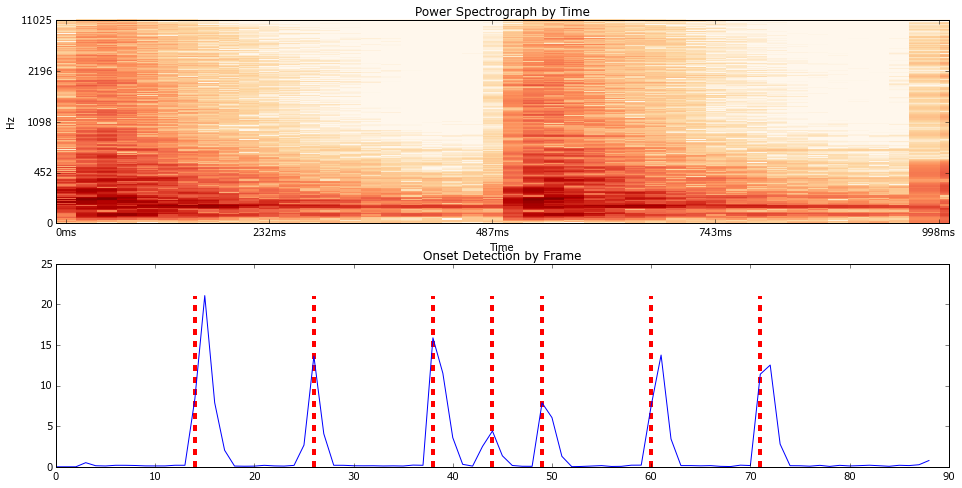

In [153]:
D2 = np.abs(librosa.stft(y2))**2
plt.figure(figsize=(16,8)) 

plt.subplot(2, 1, 1)
plt.title('Power Spectrograph by Time')
librosa.display.specshow(librosa.logamplitude(D2, ref_power=np.max), x_axis='time', y_axis='log')

plt.subplot(2, 1, 2)
plt.title('Onset Detection by Frame')
plt.plot(o_env2, label="Onset strength")
plt.vlines(onset_frames, 0, o_env2.max(), color='r', linewidth=4.00, linestyles="--")

In [154]:
for datapoint in y2:
    print datapoint, "  "
    
print len(y2)

-0.0245529
0.00432494
-0.00490284
0.00110594
-0.00313258
0.000125184
-0.00254183
-0.000328959
-0.00230573
-0.000739034
-0.00243261
-0.00108615
-0.00207332
-0.000688858
-0.00154375
-0.000699854
-0.00173738
-0.000975829
-0.00189611
-0.00133773
-0.00210127
-0.00136435
-0.00182691
-0.000992805
-0.00161151
-0.00101709
-0.00156625
-0.000778444
-0.001055
-0.000319961
-0.000764336
-0.000185931
-0.000400896
5.57477e-05
-0.000435003
4.07053e-05
-0.000150761
0.000522014
0.000369827
0.000738809
0.000430668
0.000724286
0.000216928
0.000517489
0.000192042
0.000379547
-9.03245e-06
0.000365429
0.000302184
0.000957973
0.000816852
0.000793728
0.000276065
0.000549497
0.000514992
0.000799301
0.000399474
0.000666002
0.000388797
0.00106096
0.00108
0.00113009
0.000348619
0.000145696
-0.000410291
-0.000183481
-0.000566467
-0.000658859
-0.000990761
-0.00109069
-0.00152632
-0.0017281
-0.00217164
-0.00213212
-0.00229247
-0.00244138
-0.00291295
-0.00307547
-0.00344834
-0.00335687
-0.00342401
-0.00326449
-0.003481